<a href="https://colab.research.google.com/github/tasyaa04/music_project/blob/main/music2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [ ]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt 

**General Functions**

In [ ]:
def get_additional_data(soup):
    links = ['https://songdata.io' + soup.find('tbody').findAll('a')[i].get('href') for i in range(0, 100, 2)]
    data = []
    for link in links:
        test = requests.get(link)
        test_soup = BeautifulSoup(test.text, 'lxml')
        data.append([test_soup.findAll('div', class_ = 'progress-bar')[i].text.strip('\n') for i in range(9)])
    return data


def df_maker(soup,j):
    length = 400
    try:
      info = [soup.find('tbody').findAll('td')[i].text for i in range (length)]
    except Exception:
      info = [soup.find('tbody').findAll('td')[i].text for i in range (length-160)]
    links = ['https://songdata.io' + soup.find('tbody').findAll('a')[i].get('href') for i in range(0, 100, 2)]
    arr = [[0 for j in range(8)] for i in range(50)]
    for i in range (400):
        arr[i//8][i%8] = info[i]
    additional_data = get_additional_data(soup)
    for ind in range(len(arr)):
        arr[ind].extend(additional_data[ind])
    header = ['Place', 'sth','English name', 'Artist', 'Key', 'Energy', 'Camelot', 'BPM',
              'Popularity', 'Acousticness', 'Liveness', 'Danceability', 'Loudness', 'Energy %',
             'Speechiness', 'Instrumentalness', 'Valence']
    df = pd.DataFrame(arr, columns = header)
    df.drop('sth',axis = 1, inplace = True)
    df['Country'] = [j]*50
    df['Link'] = links
    return df

**Argentina**

In [ ]:
url = 'https://songdata.io/charts/' + 'argentina'
t = requests.get(url)
soup = BeautifulSoup(t.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Popular Songs in Argentina | SongData.io</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Discover the most streamed songs that are currently being played in Argentina! Find out what other songs are being played in other countries." name="description"/>
<link href="https://open.scdn.co" rel="preconnect"/>
<link href="https://i.scdn.co" rel="preconnect"/>
<link href="https://open.scdn.co" rel="dns-prefetch"/>
<link href="https://i.scdn.co" rel="dns-prefetch"/>
<link as="style" href="/assets/css/songdata.min.css" rel="preload"/>
<link href="/assets/css/songdata.min.css" media="screen" rel="stylesheet" type="text/css"/>
<link as="style" href="https://cdn.datatables.net/1.10.21/css/dataTables.foundation.min.css" rel="preload"/>
<link href="https://cdn.datatables.net/1.10.21/css/dataTables.foundation.min.css" rel="stylesheet"/>
<link as="style" href="https://fonts.googleapis.

In [ ]:
info = [soup.find('tbody').findAll('td')[i].text for i in range(400)]
info

['1',
 '',
 'Paulo Londra: Bzrp Music Sessions, Vol. 23',
 'Bizarrap, Paulo Londra',
 'C Major',
 '9',
 '8B',
 '96',
 '2',
 '',
 'Si Quieren Frontear',
 'Duki, De La Ghetto, Quevedo',
 'F♯ Major',
 '6',
 '2B',
 '95',
 '3',
 '',
 'ARRANCARMELO',
 'WOS',
 'F Major',
 '4',
 '7B',
 '82',
 '4',
 '',
 'Plan A',
 'Paulo Londra',
 'C Major',
 '8',
 '8B',
 '174',
 '5',
 '',
 'CUATRO VEINTE',
 'Emilia',
 'G Minor',
 '7',
 '6A',
 '95',
 '6',
 '',
 'Una Noche en Medellín',
 'Cris Mj',
 'B♭ Minor',
 '5',
 '3A',
 '96',
 '7',
 '',
 'Marte',
 'Sofía Reyes, Maria Becerra',
 'F Major',
 '6',
 '7B',
 '90',
 '8',
 '',
 'Desesperados',
 'Rauw Alejandro, Chencho Corleone',
 'D♭ Minor',
 '7',
 '12A',
 '90',
 '9',
 '',
 'Universo Paralelo',
 "La K'onga, Nahuel Pennisi",
 'E Major',
 '7',
 '12B',
 '150',
 '10',
 '',
 'Tiago PZK: Bzrp Music Sessions, Vol. 48',
 'Bizarrap, Tiago PZK',
 'D♭ Minor',
 '8',
 '12A',
 '96',
 '11',
 '',
 'Chance',
 'Paulo Londra',
 'C Major',
 '8',
 '8B',
 '174',
 '12',
 '',
 'As It Wa

In [ ]:
arr = [[0 for j in range(8)] for i in range(50)]
for i in range(400):
    arr[i // 8][i % 8] = info[i]
print(*arr)

['1', '', 'Paulo Londra: Bzrp Music Sessions, Vol. 23', 'Bizarrap, Paulo Londra', 'C Major', '9', '8B', '96'] ['2', '', 'Si Quieren Frontear', 'Duki, De La Ghetto, Quevedo', 'F♯ Major', '6', '2B', '95'] ['3', '', 'ARRANCARMELO', 'WOS', 'F Major', '4', '7B', '82'] ['4', '', 'Plan A', 'Paulo Londra', 'C Major', '8', '8B', '174'] ['5', '', 'CUATRO VEINTE', 'Emilia', 'G Minor', '7', '6A', '95'] ['6', '', 'Una Noche en Medellín', 'Cris Mj', 'B♭ Minor', '5', '3A', '96'] ['7', '', 'Marte', 'Sofía Reyes, Maria Becerra', 'F Major', '6', '7B', '90'] ['8', '', 'Desesperados', 'Rauw Alejandro, Chencho Corleone', 'D♭ Minor', '7', '12A', '90'] ['9', '', 'Universo Paralelo', "La K'onga, Nahuel Pennisi", 'E Major', '7', '12B', '150'] ['10', '', 'Tiago PZK: Bzrp Music Sessions, Vol. 48', 'Bizarrap, Tiago PZK', 'D♭ Minor', '8', '12A', '96'] ['11', '', 'Chance', 'Paulo Londra', 'C Major', '8', '8B', '174'] ['12', '', 'As It Was', 'Harry Styles', 'G Minor', '6', '6A', '85'] ['13', '', 'Tranquila', 'FMK, M

In [ ]:
additional_data = get_additional_data(soup)
for i in range(len(arr)):
    arr[i].extend(additional_data[i])
print(*arr)

['1', '', 'Paulo Londra: Bzrp Music Sessions, Vol. 23', 'Bizarrap, Paulo Londra', 'C Major', '9', '8B', '96', '84%', '25%', '90%', '10%', '9%', '61%', '0%', '95%', '32%'] ['2', '', 'Si Quieren Frontear', 'Duki, De La Ghetto, Quevedo', 'F♯ Major', '6', '2B', '95', '84%', '5%', '56%', '7%', '47%', '90%', '0%', '85%', '71%'] ['3', '', 'ARRANCARMELO', 'WOS', 'F Major', '4', '7B', '82', '47%', '72%', '35%', '13%', '7%', '65%', '0%', '88%', '26%'] ['4', '', 'Plan A', 'Paulo Londra', 'C Major', '8', '8B', '174', '89%', '5%', '83%', '7%', '4%', '58%', '0%', '92%', '56%'] ['5', '', 'CUATRO VEINTE', 'Emilia', 'G Minor', '7', '6A', '95', '43%', '8%', '70%', '10%', '5%', '76%', '0%', '94%', '50%'] ['6', '', 'Una Noche en Medellín', 'Cris Mj', 'B♭ Minor', '5', '3A', '96', '91%', '9%', '55%', '5%', '8%', '87%', '0%', '91%', '83%'] ['7', '', 'Marte', 'Sofía Reyes, Maria Becerra', 'F Major', '6', '7B', '90', '80%', '7%', '60%', '13%', '6%', '70%', '0%', '91%', '64%'] ['8', '', 'Desesperados', 'Rauw Al

In [ ]:
header = ['Place', 'sth','English name', 'Artist', 'Key', 'Energy', 'Camelot', 'BPM',
              'Popularity', 'Acousticness', 'Energy %', 'Liveness', 'Speechiness', 'Danceability',
             'Instrumentalness', 'Loudness', 'Valence']
df = pd.DataFrame(arr, columns = header)
df.drop('sth',axis = 1, inplace = True)
df['Country'] = ['argentina'] * 50
links = ['https://songdata.io' + soup.find('tbody').findAll('a')[i].get('href') for i in range(0, 100, 2)]
df['Link'] = links
df

,Place,English name,Artist,Key,Energy,Camelot,BPM,Popularity,Acousticness,Energy %,Liveness,Speechiness,Danceability,Instrumentalness,Loudness,Valence,Country,Link
0,1,"Paulo Londra: Bzrp Music Sessions, Vol. 23","Bizarrap, Paulo Londra",C Major,9,8B,96,84%,25%,90%,10%,9%,61%,0%,95%,32%,argentina,https://songdata.io/track/2uky0VCI2EZni0nArOPz...
1,2,Si Quieren Frontear,"Duki, De La Ghetto, Quevedo",F♯ Major,6,2B,95,84%,5%,56%,7%,47%,90%,0%,85%,71%,argentina,https://songdata.io/track/6bQ5823aHmFVKLZW8E7r...
2,3,ARRANCARMELO,WOS,F Major,4,7B,82,47%,72%,35%,13%,7%,65%,0%,88%,26%,argentina,https://songdata.io/track/2x8oBuYaObjqHqgGuIUZ...
3,4,Plan A,Paulo Londra,C Major,8,8B,174,89%,5%,83%,7%,4%,58%,0%,92%,56%,argentina,https://songdata.io/track/2gpQi3hbcUAcEG8m2dlg...
4,5,CUATRO VEINTE,Emilia,G Minor,7,6A,95,43%,8%,70%,10%,5%,76%,0%,94%,50%,argentina,https://songdata.io/track/1TpZKxGnHp37ohJRszTS...
5,6,Una Noche en Medellín,Cris Mj,B♭ Minor,5,3A,96,91%,9%,55%,5%,8%,87%,0%,91%,83%,argentina,https://songdata.io/track/1O2pcBJGej0pmH2Y9XZM...
6,7,Marte,"Sofía Reyes, Maria Becerra",F Major,6,7B,90,80%,7%,60%,13%,6%,70%,0%,91%,64%,argentina,https://songdata.io/track/1uK5rDY3BnikyG0sl3tP...
7,8,Desesperados,"Rauw Alejandro, Chencho Corleone",D♭ Minor,7,12A,90,85%,36%,69%,9%,8%,87%,0%,94%,51%,argentina,https://songdata.io/track/6mmPpaltUZK7xjNlBPQQ...
8,9,Universo Paralelo,"La K'onga, Nahuel Pennisi",E Major,7,12B,150,75%,46%,74%,28%,17%,62%,0%,90%,67%,argentina,https://songdata.io/track/6LBpjWMfy1NUfyxAJbcM...
9,10,"Tiago PZK: Bzrp Music Sessions, Vol. 48","Bizarrap, Tiago PZK",D♭ Minor,8,12A,96,85%,47%,82%,10%,32%,66%,0%,95%,76%,argentina,https://songdata.io/track/2Gq636OOGgxCTqEuzCZh...


In [ ]:
countries = ['australia', 'austria', 'belarus', 'belgium', 'bolivia', 'brazil', 'bulgaria', 'banada', 'chile',
             'colombia', 'costa-rica', 'czech-republic', 'denmark', 'dominican-republic', 'ecuador', 'egypt', 'el-salvador',
             'estonia', 'finland', 'france', 'germany', 'greece', 'guatemala', 'honduras', 'hong-kong', 'hungary', 'iceland', 
             'india', 'indonesia', 'ireland', 
             'israel', 'italy', 'japan', 'kazakhstan', 'latvia', 'lithuania', 
             #'luxembourg', 
             'malaysia', 'mexico', 'morocco', 'netherlands', 'new-zealand', 'nicaragua', 'nigeria', 'norway', 'panama', 
             'paraguay', 'peru', 'philippines', 'poland', 'portugal', 'romania' 'saudi-arabia', 'singapore', 'slovakia', 
             'south-africa', 'south-korea', 'spain', 'sweden', 'switzerland', 'taiwan', 'thailand', 'turkey', 'ukraine',
             'uae', 'united-kingdom', 'united-states', 'uruguay', 'vietnam']



sou = []
for i in countries:
    url = 'https://songdata.io/charts/' + i
    t = requests.get(url)
    s = BeautifulSoup(t.text, 'lxml')
    df = df.append(df_maker(s,i))
df

,Place,English name,Artist,Key,Energy,Camelot,BPM,Popularity,Acousticness,Energy %,Liveness,Speechiness,Danceability,Instrumentalness,Loudness,Valence,Country,Link
0,1,"Paulo Londra: Bzrp Music Sessions, Vol. 23","Bizarrap, Paulo Londra",C Major,9,8B,96,84%,25%,90%,10%,9%,61%,0%,95%,32%,argentina,https://songdata.io/track/2uky0VCI2EZni0nArOPz...
1,2,Si Quieren Frontear,"Duki, De La Ghetto, Quevedo",F♯ Major,6,2B,95,84%,5%,56%,7%,47%,90%,0%,85%,71%,argentina,https://songdata.io/track/6bQ5823aHmFVKLZW8E7r...
2,3,ARRANCARMELO,WOS,F Major,4,7B,82,47%,72%,35%,13%,7%,65%,0%,88%,26%,argentina,https://songdata.io/track/2x8oBuYaObjqHqgGuIUZ...
3,4,Plan A,Paulo Londra,C Major,8,8B,174,89%,5%,83%,7%,4%,58%,0%,92%,56%,argentina,https://songdata.io/track/2gpQi3hbcUAcEG8m2dlg...
4,5,CUATRO VEINTE,Emilia,G Minor,7,6A,95,43%,8%,70%,10%,5%,76%,0%,94%,50%,argentina,https://songdata.io/track/1TpZKxGnHp37ohJRszTS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,46,Thích Em Hơi Nhiều,Wren Evans,B Major,4,1B,143,57%,37%,92%,41%,0%,13%,84%,46%,86%,vietnam,https://songdata.io/track/45Mswno1F7FoZkcmQkp7...
46,47,3 1 0 7 (feat. Duongg & Nâu),"W/N, Duongg, Nâu",B Major,5,1B,124,60%,85%,79%,46%,0%,18%,87%,6%,48%,vietnam,https://songdata.io/track/5uyNAX6MazVAjBjVeOsT...
47,48,Đôi Mi Em Đang U Sầu,"Đông Nhi, Wowy",D Major,6,10B,105,27%,20%,81%,61%,0%,7%,86%,5%,12%,vietnam,https://songdata.io/track/0TAEZOaoZx5LBXEkePNr...
48,49,Hẹn Ước Từ Hư Vô - Live,Mỹ Tâm,B♭ Major,3,6B,94,62%,80%,64%,32%,0%,14%,78%,4%,32%,vietnam,https://songdata.io/track/2tg8L2ls1k19B2SvRKBn...


In [ ]:
df = df.reset_index(drop=True)
df

,Place,English name,Artist,Key,Energy,Camelot,BPM,Popularity,Acousticness,Energy %,Liveness,Speechiness,Danceability,Instrumentalness,Loudness,Valence,Country,Link
0,1,"Paulo Londra: Bzrp Music Sessions, Vol. 23","Bizarrap, Paulo Londra",C Major,9,8B,96,84%,25%,90%,10%,9%,61%,0%,95%,32%,argentina,https://songdata.io/track/2uky0VCI2EZni0nArOPz...
1,2,Si Quieren Frontear,"Duki, De La Ghetto, Quevedo",F♯ Major,6,2B,95,84%,5%,56%,7%,47%,90%,0%,85%,71%,argentina,https://songdata.io/track/6bQ5823aHmFVKLZW8E7r...
2,3,ARRANCARMELO,WOS,F Major,4,7B,82,47%,72%,35%,13%,7%,65%,0%,88%,26%,argentina,https://songdata.io/track/2x8oBuYaObjqHqgGuIUZ...
3,4,Plan A,Paulo Londra,C Major,8,8B,174,89%,5%,83%,7%,4%,58%,0%,92%,56%,argentina,https://songdata.io/track/2gpQi3hbcUAcEG8m2dlg...
4,5,CUATRO VEINTE,Emilia,G Minor,7,6A,95,43%,8%,70%,10%,5%,76%,0%,94%,50%,argentina,https://songdata.io/track/1TpZKxGnHp37ohJRszTS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,46,Thích Em Hơi Nhiều,Wren Evans,B Major,4,1B,143,57%,37%,92%,41%,0%,13%,84%,46%,86%,vietnam,https://songdata.io/track/45Mswno1F7FoZkcmQkp7...
3396,47,3 1 0 7 (feat. Duongg & Nâu),"W/N, Duongg, Nâu",B Major,5,1B,124,60%,85%,79%,46%,0%,18%,87%,6%,48%,vietnam,https://songdata.io/track/5uyNAX6MazVAjBjVeOsT...
3397,48,Đôi Mi Em Đang U Sầu,"Đông Nhi, Wowy",D Major,6,10B,105,27%,20%,81%,61%,0%,7%,86%,5%,12%,vietnam,https://songdata.io/track/0TAEZOaoZx5LBXEkePNr...
3398,49,Hẹn Ước Từ Hư Vô - Live,Mỹ Tâm,B♭ Major,3,6B,94,62%,80%,64%,32%,0%,14%,78%,4%,32%,vietnam,https://songdata.io/track/2tg8L2ls1k19B2SvRKBn...


In [ ]:
headers = ['Popularity', 'Acousticness',	'Energy %',	'Liveness',	'Speechiness',
           'Danceability',	'Instrumentalness',	'Loudness',	'Valence']
for name in headers:
  df[name] = pd.to_numeric(df[name].str.replace("%", ''), errors = 'coerce')
df

,Place,English name,Artist,Key,Energy,Camelot,BPM,Popularity,Acousticness,Energy %,Liveness,Speechiness,Danceability,Instrumentalness,Loudness,Valence,Country,Link
0,1,"Paulo Londra: Bzrp Music Sessions, Vol. 23","Bizarrap, Paulo Londra",C Major,9,8B,96,84,25,90,10,9,61,0,95,32,argentina,https://songdata.io/track/2uky0VCI2EZni0nArOPz...
1,2,Si Quieren Frontear,"Duki, De La Ghetto, Quevedo",F♯ Major,6,2B,95,84,5,56,7,47,90,0,85,71,argentina,https://songdata.io/track/6bQ5823aHmFVKLZW8E7r...
2,3,ARRANCARMELO,WOS,F Major,4,7B,82,47,72,35,13,7,65,0,88,26,argentina,https://songdata.io/track/2x8oBuYaObjqHqgGuIUZ...
3,4,Plan A,Paulo Londra,C Major,8,8B,174,89,5,83,7,4,58,0,92,56,argentina,https://songdata.io/track/2gpQi3hbcUAcEG8m2dlg...
4,5,CUATRO VEINTE,Emilia,G Minor,7,6A,95,43,8,70,10,5,76,0,94,50,argentina,https://songdata.io/track/1TpZKxGnHp37ohJRszTS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,46,Thích Em Hơi Nhiều,Wren Evans,B Major,4,1B,143,57,37,92,41,0,13,84,46,86,vietnam,https://songdata.io/track/45Mswno1F7FoZkcmQkp7...
3396,47,3 1 0 7 (feat. Duongg & Nâu),"W/N, Duongg, Nâu",B Major,5,1B,124,60,85,79,46,0,18,87,6,48,vietnam,https://songdata.io/track/5uyNAX6MazVAjBjVeOsT...
3397,48,Đôi Mi Em Đang U Sầu,"Đông Nhi, Wowy",D Major,6,10B,105,27,20,81,61,0,7,86,5,12,vietnam,https://songdata.io/track/0TAEZOaoZx5LBXEkePNr...
3398,49,Hẹn Ước Từ Hư Vô - Live,Mỹ Tâm,B♭ Major,3,6B,94,62,80,64,32,0,14,78,4,32,vietnam,https://songdata.io/track/2tg8L2ls1k19B2SvRKBn...


**Analysis**

In [ ]:
df['BPM'] = pd.to_numeric(df['BPM'], errors = 'coerce')
df['Energy'] = pd.to_numeric(df['Energy'], errors = 'coerce')
df.describe()

,Energy,BPM,Popularity,Acousticness,Energy %,Liveness,Speechiness,Danceability,Instrumentalness,Loudness,Valence
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,6.411471,122.176765,68.672647,25.908235,67.356765,63.364412,4.070588,17.113529,86.828235,11.913235,51.671471
std,1.670694,30.945343,25.201831,25.193826,15.286364,17.447703,16.652489,14.063155,13.115300,13.726915,24.189249
min,0.000000,50.000000,0.000000,0.000000,20.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.000000
25%,5.000000,95.000000,58.000000,5.000000,58.000000,54.000000,0.000000,9.000000,86.000000,4.000000,33.000000
50%,7.000000,120.000000,78.000000,18.000000,70.000000,66.000000,0.000000,12.000000,90.000000,7.000000,52.000000
75%,8.000000,142.000000,86.000000,41.000000,79.000000,76.000000,0.000000,19.000000,92.000000,14.000000,71.000000
max,10.000000,228.000000,100.000000,99.000000,98.000000,99.000000,96.000000,97.000000,100.000000,95.000000,98.000000


In [ ]:
#Средние значения числовых величин по странам
mean_country = df.groupby('Country').agg('mean')
mean_country

,Energy,BPM,Popularity,Acousticness,Energy %,Liveness,Speechiness,Danceability,Instrumentalness,Loudness,Valence
Country,,,,,,,,,,,
argentina,6.28,115.82,72.10,25.62,63.28,15.38,13.36,70.48,1.88,89.82,61.56
australia,6.50,124.68,78.34,19.66,64.44,65.14,3.20,17.02,88.68,10.30,50.96
austria,7.04,126.22,67.98,19.02,67.86,70.78,3.70,20.88,88.94,8.96,47.30
banada,6.64,123.48,85.22,18.88,65.60,66.42,1.90,15.48,89.26,10.18,49.60
belarus,6.68,122.30,63.92,17.74,68.44,67.00,7.38,16.40,87.20,12.14,44.54
...,...,...,...,...,...,...,...,...,...,...,...
ukraine,6.46,121.58,59.28,24.60,71.04,64.60,7.70,14.56,87.20,14.20,47.24
united-kingdom,6.64,126.30,79.66,21.74,66.54,65.94,1.86,16.22,88.96,11.68,50.78
united-states,6.12,119.82,78.78,17.56,63.62,60.64,1.90,15.32,88.18,14.40,44.68


In [ ]:
##Средние значения числовых величин по тональностям
mean_key = df.groupby('Key').agg('mean')
mean_key

,Energy,BPM,Popularity,Acousticness,Energy %,Liveness,Speechiness,Danceability,Instrumentalness,Loudness,Valence
Key,,,,,,,,,,,
A Major,6.448864,132.914773,62.437500,16.698864,62.375000,65.039773,0.846591,22.136364,88.579545,10.272727,48.795455
A Minor,5.920000,114.670000,62.400000,29.410000,67.230000,57.950000,6.670000,18.490000,85.080000,15.960000,51.670000
A♭ Major,6.407725,119.798283,72.145923,26.798283,69.553648,62.738197,1.540773,17.738197,88.412017,9.609442,52.952790
A♭ Minor,6.600000,108.885714,46.128571,36.357143,64.057143,65.514286,1.971429,16.885714,89.928571,20.028571,56.671429
B Major,5.711712,104.594595,72.657658,32.270270,70.702703,57.540541,0.225225,13.945946,88.333333,10.972973,52.234234
B Minor,7.100000,116.383333,69.137500,19.958333,70.070833,70.420833,0.900000,21.908333,89.108333,14.116667,56.700000
B♭ Major,6.290000,109.860000,61.330000,33.930000,61.810000,63.580000,1.370000,13.710000,89.110000,8.570000,45.540000
B♭ Minor,6.505682,128.852273,72.380682,15.500000,76.488636,65.403409,3.931818,12.755682,87.539773,15.102273,65.261364
C Major,6.491597,118.352941,69.596639,30.504202,66.815126,63.890756,6.521008,18.298319,87.218487,10.575630,50.478992


In [ ]:
mean_st = df['Key'].value_counts()
mean_st

D♭ Major    280
B Minor     240
C Major     238
A♭ Major    233
E Minor     209
G Major     204
G Minor     179
B♭ Minor    176
A Major     176
D Major     173
D♭ Minor    170
F♯ Major    130
F♯ Minor    118
B Major     111
F Minor     109
F Major     108
A Minor     100
B♭ Major    100
E Major      77
A♭ Minor     70
E♭ Minor     55
D Minor      54
C Minor      46
E♭ Major     44
Name: Key, dtype: int64

In [ ]:
mean_st_df = pd.DataFrame(mean_st)
mean_st_df.rename(columns = {"Key": "Amount"}, inplace = True)
mean_st_df['Key'] = mean_st_df.index
mean_st_df = mean_st_df.reset_index(drop=True)
mean_st_df

,Amount,Key
0,280,D♭ Major
1,240,B Minor
2,238,C Major
3,233,A♭ Major
4,209,E Minor
5,204,G Major
6,179,G Minor
7,176,B♭ Minor
8,176,A Major
9,173,D Major


**Graphs**

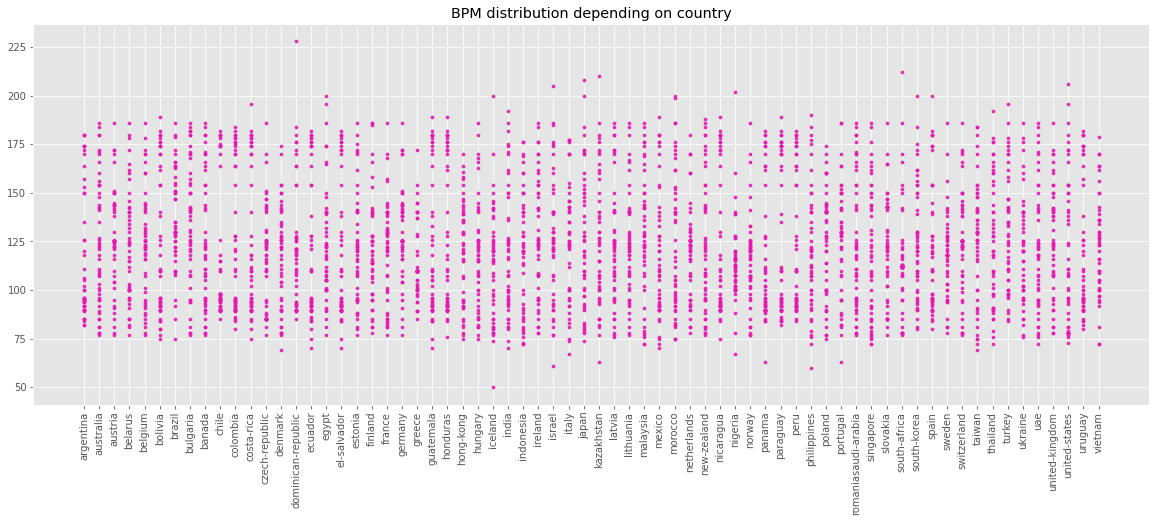

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_title('BPM distribution depending on country')
plt.scatter(df['Country'],df['BPM'], color = [0.9, 0.1, 0.7, 0.9],  s = 10)
plt.xticks(rotation = 90) 
plt.show()

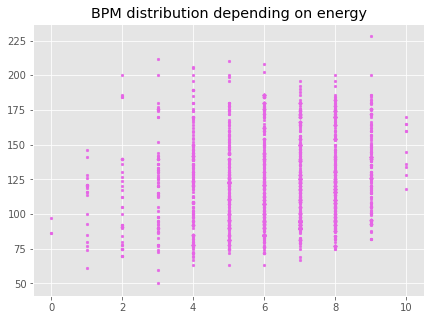

In [ ]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.style.use('ggplot')

fig, ax = plt.subplots()
ax.set_title('BPM distribution depending on energy')

plt.scatter(df['Energy'],df['BPM'], color = [0.9, 0.4, 0.9],  s = 7)
plt.show()

Text(0.5, 1.0, 'Comparison of the average by bits in different countries')

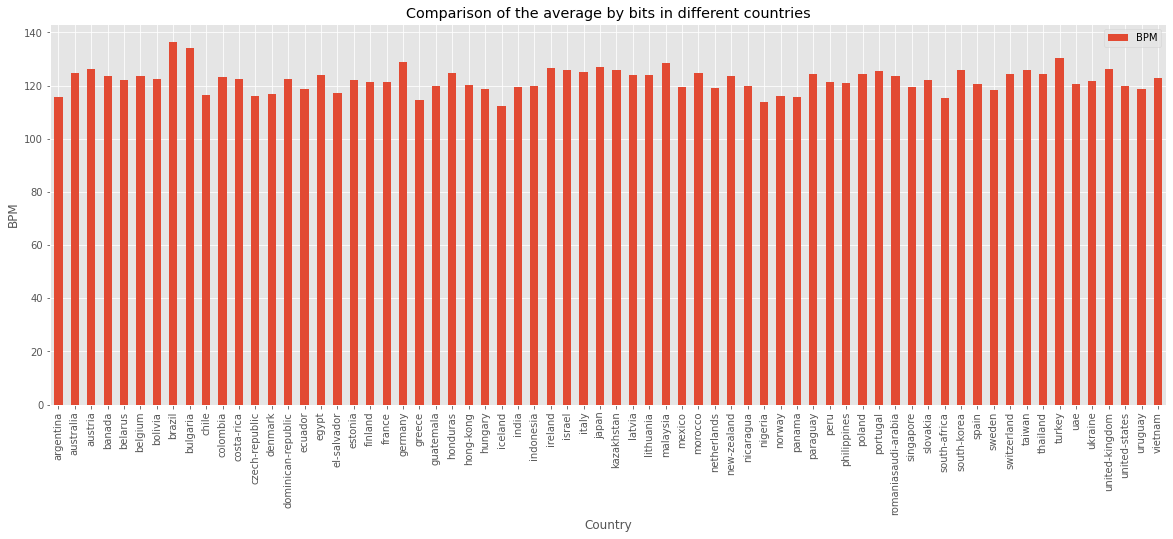

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
mean_country.pivot_table(values='BPM', index='Country',
                                          fill_value=None, margins=False, dropna=True).plot(kind = 'bar')
plt.ylabel('BPM')
plt.xlabel('Сountry')
plt.title('Comparison of the average by bits in different countries')

Text(0.5, 1.0, 'Comparison of the average energy in different countries')

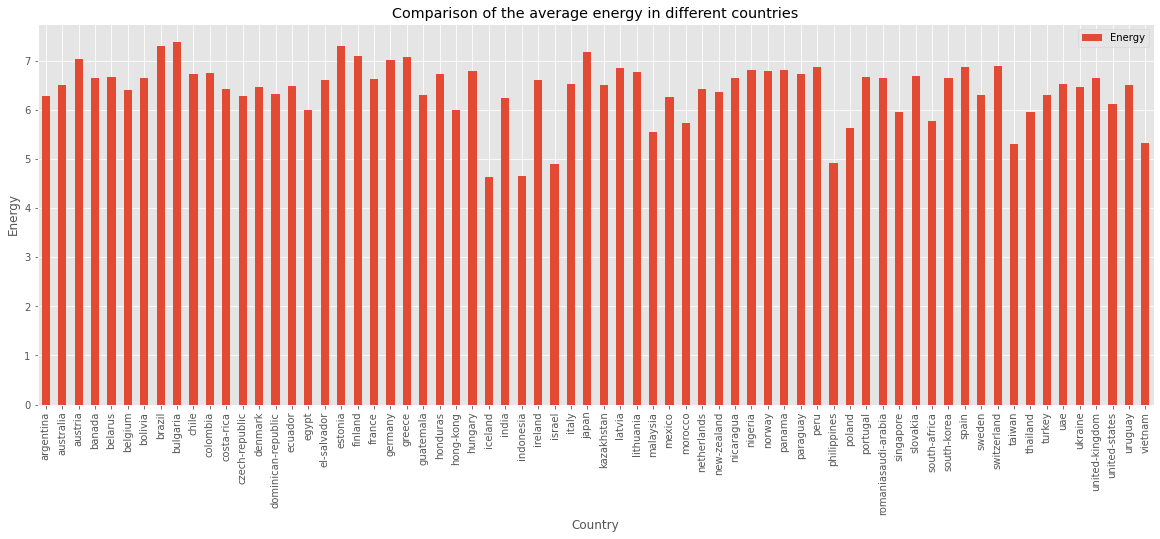

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
mean_country.pivot_table(values='Energy', index='Country',
                                          fill_value=None, margins=False, dropna=True).plot(kind = 'bar')
plt.ylabel('Energy')
plt.xlabel('Сountry')
plt.title('Comparison of the average energy in different countries')

Text(0.5, 1.0, 'Comparison of the average by BPM in different keys')

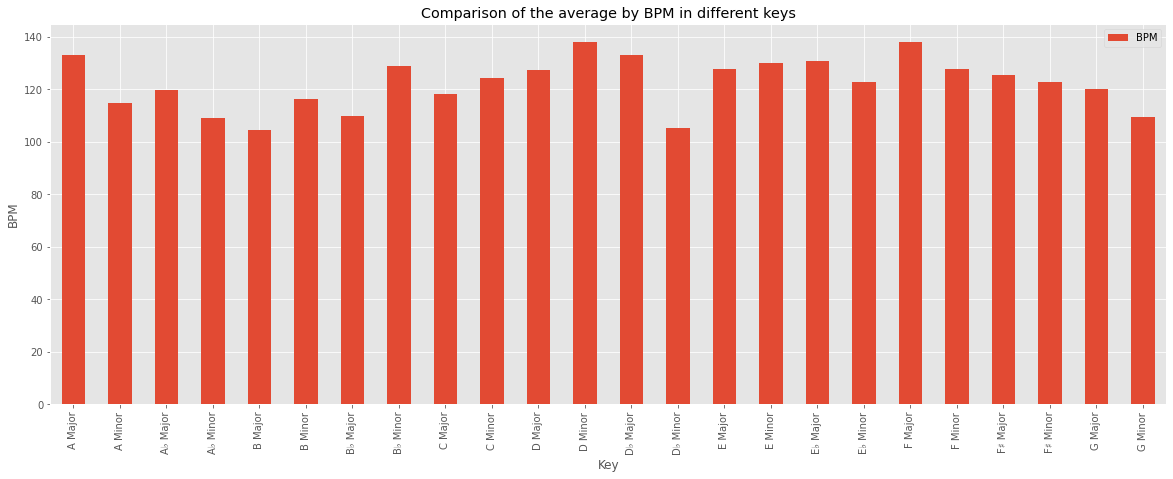

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
mean_key.pivot_table(values='BPM', index='Key',
                                          fill_value=None, margins=False, dropna=True).plot(kind = 'bar')
plt.ylabel('BPM')
plt.xlabel('Key')
plt.title('Comparison of the average by BPM in different keys')

Text(0.5, 1.0, 'BPM percentages by key in all countries')

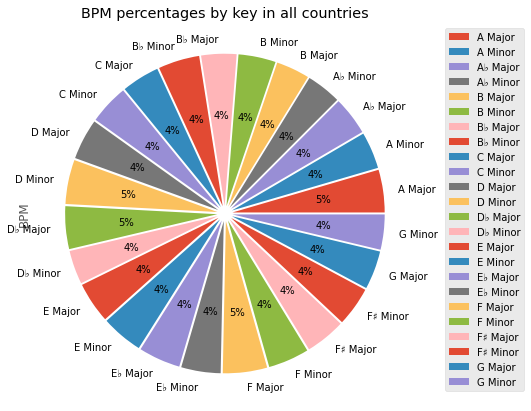

In [ ]:
explode = [0.05] * len(mean_key.index)
plt.rcParams['figure.figsize'] = (7, 7)
mean_key.groupby(['Key']).sum().plot(kind='pie', y='BPM', autopct='%1.0f%%', explode = explode)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.title('BPM percentages by key in all countries')

Text(0.5, 1.0, 'Key frequency in all countries')

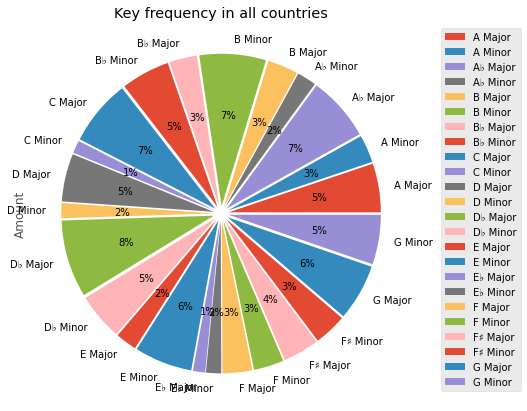

In [ ]:
explode = [0.05] * len(mean_key.index)
plt.rcParams['figure.figsize'] = (7, 7)
mean_st_df.groupby(['Key']).sum().plot(kind='pie', y='Amount', autopct='%1.0f%%', explode = explode)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.title('Key frequency in all countries')

Text(0.5, 1.0, 'The dependance of danceability on BPM')

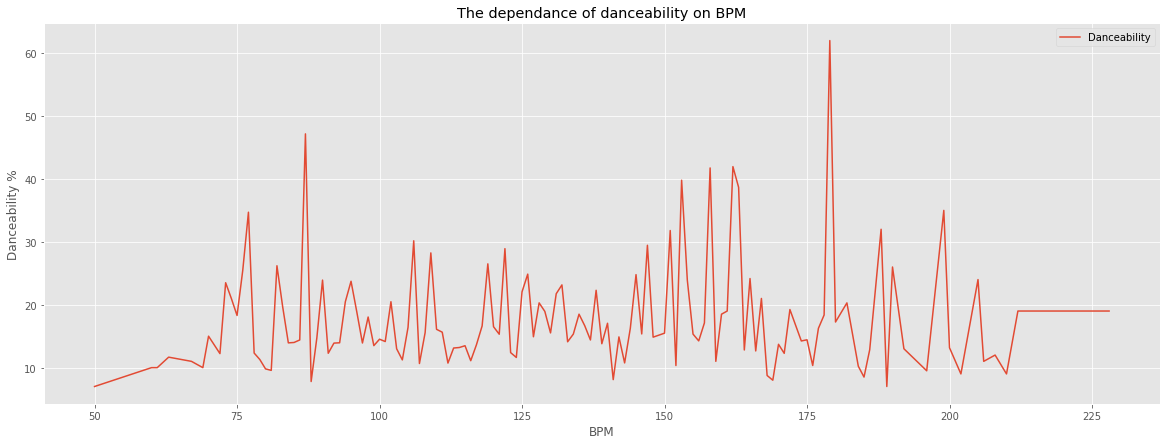

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
df.pivot_table(values='Danceability', index='BPM',
                                          fill_value=None, margins=False, dropna=True).plot(kind = 'line')
plt.ylabel('Danceability %')
plt.xlabel('BPM')
plt.title('The dependance of danceability on BPM')

Text(0.5, 1.0, 'The dependance of liveness on BPM')

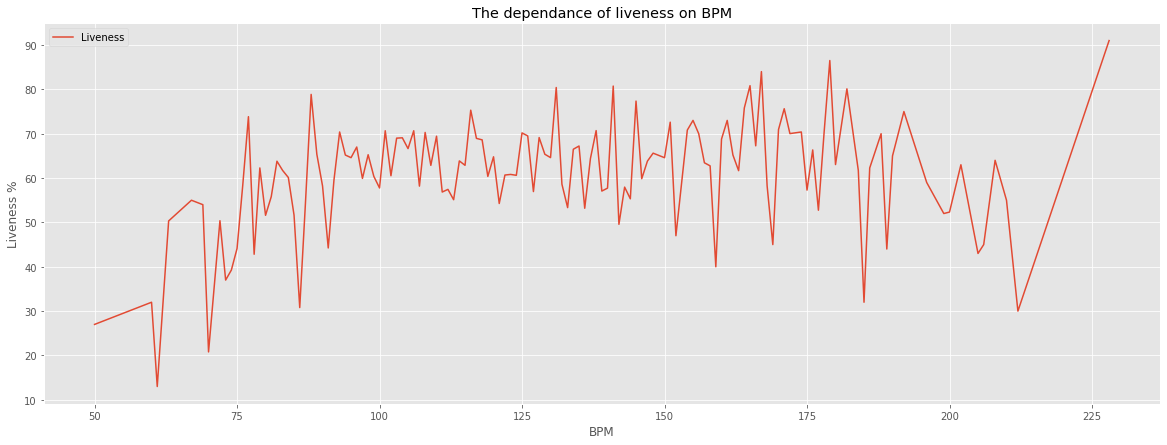

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
df.pivot_table(values='Liveness', index='BPM',
                                          fill_value=None, margins=False, dropna=True).plot(kind = 'line')
plt.ylabel('Liveness %')
plt.xlabel('BPM')
plt.title('The dependance of liveness on BPM')

Text(0.5, 1.0, 'The dependance of energy on loudness')

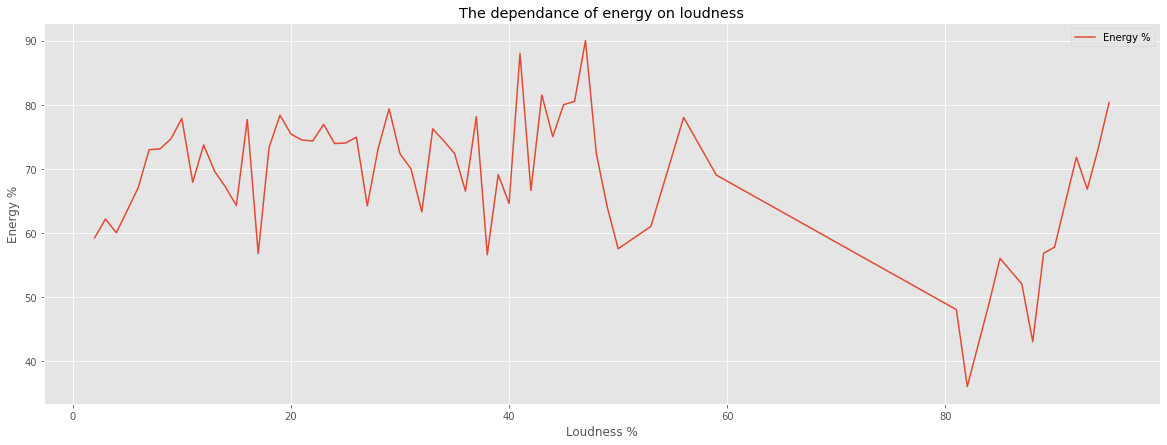

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
df.pivot_table(values='Energy %', index='Loudness',
                                          fill_value=None, margins=False, dropna=True).plot(kind = 'line')
plt.ylabel('Energy %')
plt.xlabel('Loudness %')
plt.title('The dependance of energy on loudness')

**Interactive Place**

In [ ]:
print('Write the name of the country:')
c = input().lower()
st = df[df['Country'] == c]
st

Write the name of the country:
japan


,Place,English name,Artist,Key,Energy,Camelot,BPM,Popularity,Acousticness,Energy %,Liveness,Speechiness,Danceability,Instrumentalness,Loudness,Valence,Country,Link
1650,1,W / X / Y,Tani Yuuki,D Major,8,10B,106,77,16,63,78,0,33,93,5,67,japan,https://songdata.io/track/4IfrM44LofE9bSs6TDZS...
1651,2,シンデレラボーイ,Saucy Dog,A Major,7,11B,108,74,7,60,74,0,27,89,3,52,japan,https://songdata.io/track/1Vqs0lXeJafYZz2sxnfB...
1652,3,ベテルギウス,Yuuri,F Major,7,7B,180,72,22,37,67,0,49,92,5,69,japan,https://songdata.io/track/4JK1kDUdH9RTBQrrSO1Q...
1653,4,ミックスナッツ,Official HIGE DANdism,F♯ Major,9,2B,150,40,1,54,92,0,26,92,9,78,japan,https://songdata.io/track/60ReNXcPcsVFd7nUuQw5...
1654,5,なんでもないよ、,Macaroni Empitsu,E Major,5,12B,172,69,24,60,51,0,7,90,4,65,japan,https://songdata.io/track/5W7Y92LB4jWvu9NeEQ0G...
1655,6,水平線,back number,B♭ Major,8,6B,146,77,1,42,75,0,16,94,3,44,japan,https://songdata.io/track/5m1i6hq7dmRlp3c1utE4...
1656,7,ドライフラワー,Yuuri,G Major,6,9B,148,68,50,46,60,0,17,91,3,48,japan,https://songdata.io/track/4kPlQKwtPrnqLgrmmKFS...
1657,8,カメレオン,King Gnu,C Major,5,8B,80,78,64,63,53,0,7,88,4,46,japan,https://songdata.io/track/0J0P8iSE6l3pYHbUdNFY...
1658,9,CITRUS,Da-iCE,D♭ Major,9,3B,82,76,22,55,86,0,36,96,5,74,japan,https://songdata.io/track/2IL2asrtx7XM1y8fu2RM...
1659,10,きらり,Fujii Kaze,D Major,8,10B,117,68,1,75,76,0,36,89,5,70,japan,https://songdata.io/track/51oc6MEsXTpnPn6GOw5V...


In [ ]:
#Средние значения числовых величин по тональностям
mean_st = st.groupby('Key').agg('mean')
mean_st

,Energy,BPM,Popularity,Acousticness,Energy %,Liveness,Speechiness,Danceability,Instrumentalness,Loudness,Valence
Key,,,,,,,,,,,
A Major,7.400000,129.000000,76.400000,4.800000,69.800000,75.400000,0.000000,18.400000,92.200000,6.000000,61.800000
A♭ Major,7.666667,129.666667,74.333333,3.833333,62.333333,76.500000,0.000000,18.833333,93.166667,5.000000,63.500000
B Major,8.500000,136.000000,76.500000,1.000000,54.500000,82.500000,0.000000,15.500000,92.000000,8.500000,63.500000
B♭ Major,8.000000,124.250000,72.500000,15.000000,64.000000,77.500000,0.000000,14.250000,94.000000,5.000000,54.750000
B♭ Minor,3.000000,74.000000,75.000000,78.000000,62.000000,31.000000,0.000000,12.000000,90.000000,5.000000,57.000000
C Major,6.333333,114.000000,74.666667,39.000000,58.333333,65.333333,0.000000,17.666667,89.666667,4.333333,43.666667
D Major,7.000000,118.500000,76.000000,28.250000,54.500000,66.750000,11.000000,20.250000,87.250000,6.500000,55.750000
D♭ Major,8.285714,132.857143,72.571429,13.428571,52.285714,82.428571,0.714286,33.714286,93.285714,8.714286,54.142857
E Major,3.500000,178.000000,68.500000,58.000000,42.500000,36.000000,44.500000,9.500000,82.500000,4.000000,59.500000


Text(0.5, 1.0, 'BPM percentages by key in Japan')

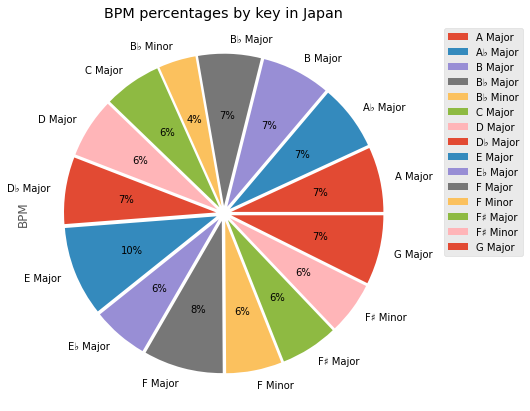

In [ ]:
explode = [0.05]*len(mean_st.index)
plt.rcParams['figure.figsize'] = (7, 7)
mean_st.groupby(['Key']).sum().plot(kind='pie', y='BPM', autopct='%1.0f%%', explode = explode)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.title('BPM percentages by key in ' + c.capitalize())

In [ ]:
st_circle = st['Key'].value_counts()
st_circle_df = pd.DataFrame(st_circle)
st_circle_df.rename(columns = {"Key": "Amount"}, inplace = True)
st_circle_df['Key'] = st_circle_df.index
st_circle_df = st_circle_df.reset_index(drop=True)
st_circle_df

,Amount,Key
0,7,D♭ Major
1,6,A♭ Major
2,5,A Major
3,4,D Major
4,4,B♭ Major
5,3,F Major
6,3,G Major
7,3,C Major
8,3,F♯ Minor
9,3,E♭ Major


Text(0.5, 1.0, 'Key frequency in Japan')

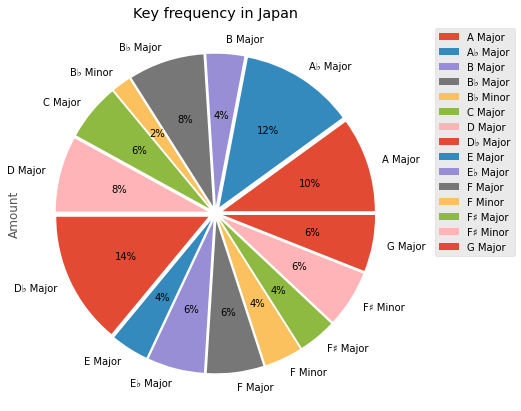

In [ ]:
explode = [0.05] * len(st_circle_df.index)
plt.rcParams['figure.figsize'] = (7, 7)
st_circle_df.groupby(['Key']).sum().plot(kind='pie', y='Amount', autopct='%1.0f%%', explode = explode)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.title('Key frequency in ' + c.capitalize())